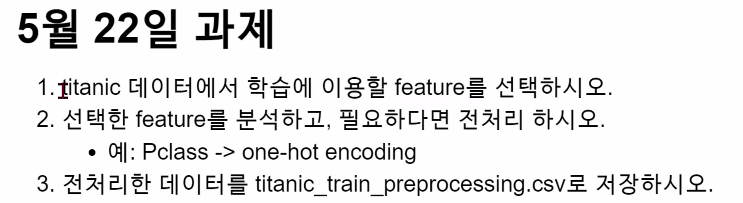

### 1. 라이브러리 불러오기

In [45]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno

### 2. 파일 불러오기 및 info 로 정보 보기 판단하기 및 데이터 확인 하기 전처리
- Age 에 결측치가 너무 많다.
- 또한 Embarked 는 결측갯수가 적어 없애버렸다.

In [46]:
# sibsp = sibling, parch=직계, embarked=어디에서 탔는가

sample = pd.read_csv("../datas/titanic_datas/train.csv",
                     index_col=0).astype({"Survived" : "category"})

sample.info()
sample.drop(columns="Embarked", inplace=True)

sample.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN


- sibling 과 parch는 가족이라 생각하여 하나로 합쳤다.

In [47]:
# 2. SibSp, Parch 는 가족이라 생각해서 하나로 합쳐버렸다
sample["Fam"] = sample["Parch"] + sample["SibSp"]
sample.drop(columns=["SibSp","Parch"], inplace=True)
sample.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Fam
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,1
5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,0


### 3. 숫자데이터 확인하기

#### 3-1. 요금과 나이에 관련한 데이터

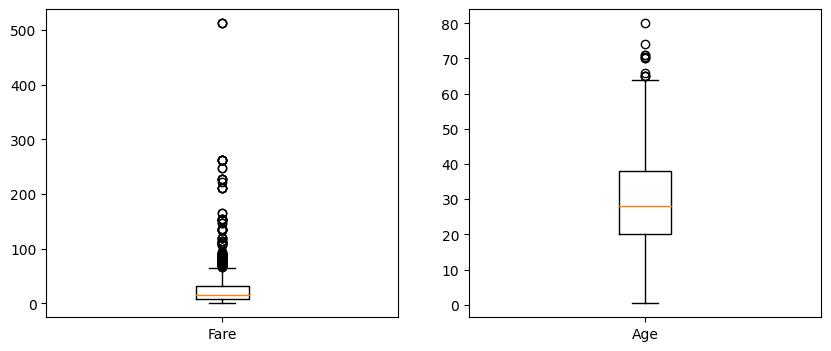

In [48]:
# Fare의 범위가 다양하지만 500 불의 값은 너무 높아 보인다.
# Age 값의 범위는 납득할 만하다.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.boxplot(sample["Fare"])
ax1.set_xticklabels(["Fare"])

ax2.boxplot(sample["Age"].dropna())
ax2.set_xticklabels(["Age"])

# 500 이넘는 숫자는 너무 적으므로 제외시켰다.
sample = sample[sample["Fare"] < 500]

#### 3-2 가족수와 요금과 관련한 데이터의 연관성 보기

In [49]:
# 가족 수와 티켓 가격도 관련이 있는지 한 번 확인해 본다.
sample[["Fam","Fare"]].corr(method='pearson', min_periods=1).style.background_gradient(cmap='coolwarm')
# 약간의 관련은 있어 보여 냅뒀다.

,Fam,Fare
Fam,1.000000,0.276580
Fare,0.276580,1.000000


#### 3-3 결측치가 많은 나이 데이터를 보고 결측치 해결하기

클래스별 남성 나이 평균 pclass 1 :  41.39818181818182
클래스별 여성 나이 평균 pclass 1 :  34.607142857142854
클래스별 남성 나이 평균 pclass 2 :  30.74070707070707
클래스별 여성 나이 평균 pclass 2 :  28.722972972972972
클래스별 남성 나이 평균 pclass 3 :  26.507588932806325
클래스별 여성 나이 평균 pclass 3 :  21.75


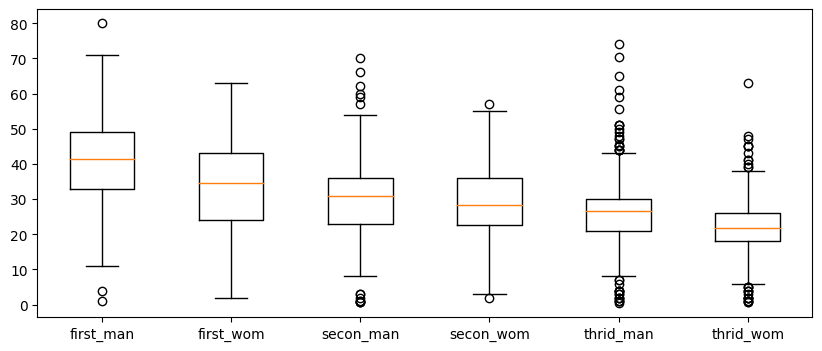

In [50]:
sample["Sex_man_is_one"] = pd.get_dummies(sample["Sex"], drop_first=True)

age_sex_1 = (sample["Pclass"] == 1) & (sample["Sex_man_is_one"] == 1)
age_sex_2 = (sample["Pclass"] == 1) & (sample["Sex_man_is_one"] == 0)
age_sex_3 = (sample["Pclass"] == 2) & (sample["Sex_man_is_one"] == 1)
age_sex_4 = (sample["Pclass"] == 2) & (sample["Sex_man_is_one"] == 0)
age_sex_5 = (sample["Pclass"] == 3) & (sample["Sex_man_is_one"] == 1)
age_sex_6 = (sample["Pclass"] == 3) & (sample["Sex_man_is_one"] == 0)

print("클래스별 남성 나이 평균 pclass 1 : ",sample[age_sex_1]["Age"].mean())
print("클래스별 여성 나이 평균 pclass 1 : ",sample[age_sex_2]["Age"].mean())
print("클래스별 남성 나이 평균 pclass 2 : ",sample[age_sex_3]["Age"].mean())
print("클래스별 여성 나이 평균 pclass 2 : ",sample[age_sex_4]["Age"].mean())
print("클래스별 남성 나이 평균 pclass 3 : ",sample[age_sex_5]["Age"].mean())
print("클래스별 여성 나이 평균 pclass 3 : ",sample[age_sex_6]["Age"].mean())

# 나이에 대한 결측치 해결 :
sample.loc[ age_sex_1  & sample["Age"].isna() , "Age"] = sample[age_sex_1]["Age"].mean()
sample.loc[ age_sex_2  & sample["Age"].isna() , "Age"] = sample[age_sex_2]["Age"].mean()
sample.loc[ age_sex_3  & sample["Age"].isna() , "Age"] = sample[age_sex_3]["Age"].mean()
sample.loc[ age_sex_4  & sample["Age"].isna() , "Age"] = sample[age_sex_4]["Age"].mean()
sample.loc[ age_sex_5  & sample["Age"].isna() , "Age"] = sample[age_sex_5]["Age"].mean()
sample.loc[ age_sex_6  & sample["Age"].isna() , "Age"] = sample[age_sex_6]["Age"].mean()

fig, ax = plt.subplots(1, 1,figsize=(10,4))

ax.boxplot([sample[age_sex_1]["Age"],
            sample[age_sex_2]["Age"],
            sample[age_sex_3]["Age"],
            sample[age_sex_4]["Age"],
            sample[age_sex_5]["Age"],
            sample[age_sex_6]["Age"],])

ax.set_xticklabels(["first_man",
                    "first_wom",
                    "secon_man",
                    "secon_wom",
                    "thrid_man",
                    "thrid_wom",]);

### 4. Categorical 데이터

#### 1. Ticket (노미널 데이터)

In [51]:
# 티켓을 숫자만 있는 티켓과, 영어가 함께있는 티켓으로 나누어 보고 비교해 보았다.
sample["Ticket"].unique()
ticket_dict = {}

for i, k in sample.iterrows():
    for j in (str(sample["Ticket"].loc[i]).split(" ")):
        if j.isdigit() == False:
            ticket_dict[i] = str(j)
            break
        elif j.isdigit():
            ticket_dict[i] = "num"
            break
        else:
            pass

In [52]:
left = sample[["Fare","Fam"]]
left.head()

,Fare,Fam
PassengerId,,
1,7.2500,1
2,71.2833,1
3,7.9250,0
4,53.1000,1
5,8.0500,0


In [53]:
ticket_cats = pd.DataFrame(data=ticket_dict.values(), index=sample.index, columns=["ticket_cats"])
ticket_fare_fam = pd.merge(left=left, right=ticket_cats, how="inner", left_on=left.index, right_on=ticket_cats.index)

ticket_fare_fam.head()

,key_0,Fare,Fam,ticket_cats
0,1,7.2500,1,A/5
1,2,71.2833,1,PC
2,3,7.9250,0,STON/O2.
3,4,53.1000,1,num
4,5,8.0500,0,num


숫자만 있는 티켓의 평균 가격 27.13089924357035
영어와 함께 있는 티켓의 평균 가격 40.631882378854634
숫자만 있는 티켓의 중간 가격 13.0
영어와 함께 있는 티켓의 중간 가격 20.25


,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Fam,Sex_man_is_one,ticket_num
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,1,1,A/5
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,1,0,PC
3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,0,0,STON/O2.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,1,0,num
5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,0,1,num


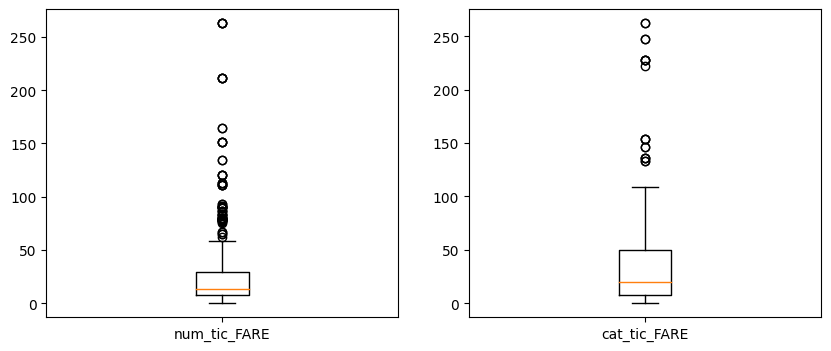

In [54]:
# 넘버 티켓 확인
num_tic = ticket_fare_fam[ticket_fare_fam["ticket_cats"] == "num"]["Fare"]
cat_tic = ticket_fare_fam[ticket_fare_fam["ticket_cats"] != "num"]["Fare"]

# 일관화를 위해 처리
ticket_fare_fam["ticket_cats"] = ticket_fare_fam["ticket_cats"].str.lower()

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))

ax1.boxplot(num_tic)
ax1.set_xticklabels(["num_tic_FARE"]);

ax2.boxplot(cat_tic)
ax2.set_xticklabels(["cat_tic_FARE"]);

print("숫자만 있는 티켓의 평균 가격",num_tic.mean())
print("영어와 함께 있는 티켓의 평균 가격",cat_tic.mean())

print("숫자만 있는 티켓의 중간 가격",num_tic.median())
print("영어와 함께 있는 티켓의 중간 가격",cat_tic.median())

sample["ticket_num"] = ticket_cats
sample.head()
# 모델 훈련시 정확도 확인 필요

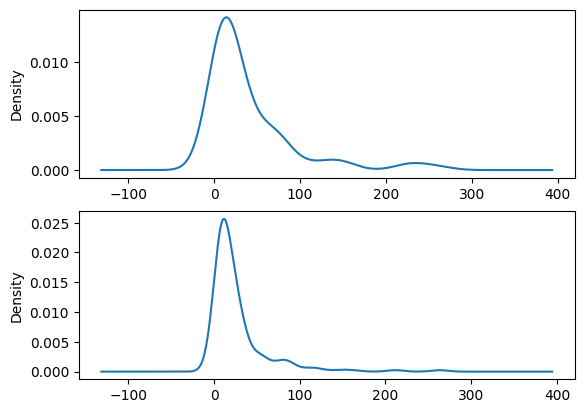

In [55]:
find_out_corr = sample[["ticket_num", "Fare"]].copy()
find_out_corr.loc[find_out_corr["ticket_num"] != "num","ticket_num"] = "non_num"

find_out_corr["str_ticket"] = pd.get_dummies(find_out_corr, drop_first=True)["ticket_num_num"]


fig, (ax, ax2) = plt.subplots(2,1)

find_out_corr[find_out_corr["ticket_num"]=="non_num"]["Fare"].plot(kind = "kde", ax= ax);
find_out_corr[find_out_corr["ticket_num"]=="num"]["Fare"].plot(kind = "kde", ax= ax2);
# 글씨가 섞인 티켓과 아닌 티켓들을 나누는 것은 그림이 너무 비슷하여 같이 분류는 큰 의미는 없어보인다.

In [56]:
# 클래스 원핫 인코딩하기
sample[["class_2","class_3"]] = pd.get_dummies(sample["Pclass"], prefix="class",drop_first=True)
sample.head(2)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Fam,Sex_man_is_one,ticket_num,class_2,class_3
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,1,1,A/5,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,1,0,PC,0,0


### 최종 데이터 및 저장하기

In [57]:
sample[["Name", "Pclass","class_2","class_3","Sex", "Sex_man_is_one","Age", "Fare", "Fam", "Survived"]]

,Name,Pclass,class_2,class_3,Sex,Sex_man_is_one,Age,Fare,Fam,Survived
PassengerId,,,,,,,,,,
1,"Braund, Mr. Owen Harris",3,0,1,male,1,22.00,7.2500,1,0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,0,female,0,38.00,71.2833,1,1
3,"Heikkinen, Miss. Laina",3,0,1,female,0,26.00,7.9250,0,1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,0,female,0,35.00,53.1000,1,1
5,"Allen, Mr. William Henry",3,0,1,male,1,35.00,8.0500,0,0
...,...,...,...,...,...,...,...,...,...,...
887,"Montvila, Rev. Juozas",2,1,0,male,1,27.00,13.0000,0,0
888,"Graham, Miss. Margaret Edith",1,0,0,female,0,19.00,30.0000,0,1
889,"Johnston, Miss. Catherine Helen ""Carrie""",3,0,1,female,0,21.75,23.4500,3,0


In [58]:
sample.to_csv("../datas/titanic_datas/titinic_train_preprocessing.csv")